In [4]:
from astropy import units as u

from poliastro.bodies import Earth, Mars, Sun
from poliastro.twobody import Orbit

# Needed to handle TLE into Poliastro's Orbit
from tletools import TLE

# Needed for defining manouvers
from poliastro.maneuver import Maneuver

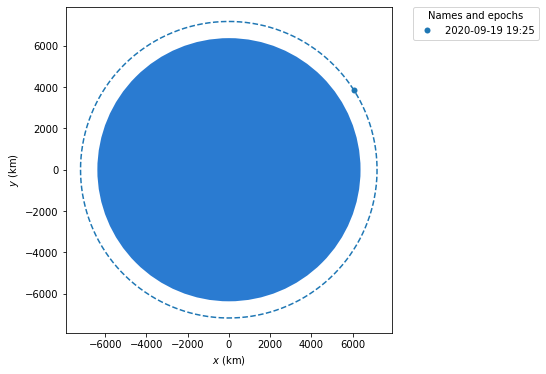

In [6]:
# Let's get the TLE orbital data for the target satellite. As an example, let's pick a dead NOAA-17 sat.
# Its TLE data can be obtained from many places, such as celestrak or n2yo (https://www.n2yo.com/satellite/?s=27453)

tle_text = """NOAA-17
1 27453U 02032A   20263.80942421 -.00000011 +00000-0 +13583-4 0  9998
2 27453 098.5909 208.3215 0011096 327.5463 032.5033 14.25072668948324"""
tle_lines = tle_text.strip().splitlines()

tle = TLE.from_lines(*tle_lines)

orb2 = tle.to_orbit()

orb2.plot()

In [8]:
orb2

7178 x 7194 km x 98.6 deg (GCRS) orbit around Earth (♁) at epoch 2020-09-19T19:25:34.251744000 (UTC)

In [10]:
# This will return classical elements: Semimajor axis (𝑎), eccentricity (e), inclination (i), RAAN (Ω) - right ascension of the ascending node, argument or perigeum (𝜔), nu (𝜈) - true anomaly
orb2.classical()

(<Quantity 7186.38534253 km>,
 <Quantity 0.0011096>,
 <Quantity 98.5909 deg>,
 <Quantity 208.3215 deg>,
 <Quantity 327.5463 deg>,
 <Quantity 32.57170424 deg>)

In [12]:
# Define a Hohmann manouver that raises an orbit to 36000km
hoh = Maneuver.hohmann(orb2, 36000 * u.km)
print("There are %s impulses needed to conduct Hohmann transfer" % len(hoh.impulses))
print(hoh.impulses[0])
print(hoh.impulses[1])
print("The total Delta-v cost is %s, the total time is %s" % (hoh.get_total_cost(), hoh.get_total_time()))

There are 2 impulses needed to conduct Hohmann transfer
(<Quantity -547.39608549 s>, <Quantity [-1153.06909054,  -311.1783978 ,  1807.77931493] m / s>)
(<Quantity 15784.68720455 s>, <Quantity [  749.72472309,   202.32797847, -1175.41685698] m / s>)
The total Delta-v cost is 3.575440182097535 km / s, the total time is 15237.29111905773 s


In [13]:
# Obtain the orbit after applying Hohmann transfer.

from poliastro.plotting import OrbitPlotter2D

op = OrbitPlotter2D()
orb3, orb4 = orb2.apply_maneuver(hoh, intermediate=True)
op.plot(orb2, label="Initial orbit")
op.plot(orb3, label="Transfer orbit")
op.plot(orb4, label="Final orbit")